In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd

In [6]:
class cell():
    def master_controls(self,frames,mito,c1,c2,c3,c4):
        N = mito 
        columns = []
        for mito in range(N):
            columns.append('m'+str(mito)+'_x')
            columns.append('m'+str(mito)+'_y')
            columns.append('m'+str(mito)+'_z')
        df = pd.DataFrame(columns=columns)
        frames = frames 
        limit = 100
        L  = limit*2
        P = 10
        V = 10 
        delta = 1 
        c1 = c1 #Attraction
        c2 = c2 #Repulsion
        c3 = c3 #Heading
        c4 = c4 #Randomness 
        vlimit = 1 
        filenames = []

        p = P*np.random.randn(2,N)
        v = V*np.random.randn(2,N)

        plt.ion()
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)
        
        for i in range(frames):

            v1 = np.zeros((2,N+2))
            v2 = np.zeros((2,N+2))                 
            v3 = ( (np.sum(v[0,:])/(N) ) + (np.sum(v[1,:])/(N)) ) * c3; 
            v4 = np.zeros((2,N))

            if (np.linalg.norm(v3) > vlimit):
                v3 *= vlimit / np.linalg.norm(v3)

            for n in range(N):
                for m in range(N):
                    if m!=n:
                        r = p[:,m] - p[:,n] 
                        if r[0] > L/2:
                            r[0] -= L
                        elif r[0] < -L/2:
                            r[0] += L
                        if r[1] > L/2:
                            r[1] -= L
                        elif r[1] < -L/2:
                            r[1] += L
                        rmag = np.sqrt( r[0]**2  + r[1]**2 )
                        v1[:,n] += c1*r 
                        v2[:,n] -= (c2 * r) / (rmag**2)
                v4[:,n] = c4 * np.random.randn(2)          
                v[:,n] = v1[:,n] + v2[:,n] + v3 + v4[:,n] 

            for n in range(0, N):    
                p[:,n] +=  v[:,n] * delta 

            tmp_p = p
            tmp_p[0, p[0,:] >  L/2]  = tmp_p[0,p[0,:]> (L/2)] - L
            tmp_p[1, p[1,:] >  L/2]  = tmp_p[1, p[1,:] > (L/2)] - L
            tmp_p[0, p[0,:] < -L/2]  = tmp_p[0, p[0,:] < (-L/2)] + L
            tmp_p[1, p[1,:] < -L/2]  = tmp_p[1, p[1,:] < (-L/2)] + L
            p = tmp_p

            line1, = ax.plot(p[0, 0], p[1, 0])
            colors = "orange"

            ax.clear()
            ax.scatter(p[0,:], p[1,:], c=colors, alpha=1)
            plt.xlim(-limit, limit)
            plt.ylim(-limit, limit)
            line1.set_data(p[0,:], p[1,:])
            fig.canvas.draw()

            plt.savefig('mito/master_controls/frames/frame' + str(i) +'.jpg')
            filenames.append('mito/master_controls/frames/frame' + str(i) + '.jpg')
            plt.savefig(filenames[i])
            images = []
            for filename in filenames:
                images.append(imageio.imread(filename))
            imageio.mimsave('mito/master_controls/mito_mc.gif',images)

            data = {}
            for i in range(0,len(df.columns),3):
                data[df.columns[i]] = p[0][i%N]
                data[df.columns[i+1]] = p[1][i%N]
                data[df.columns[i+2]] = 0
            df = df.append(data, ignore_index = True)

        return df
    def attraction(self,frames,mito):
        N = mito 
        columns = []
        for mito in range(N):
            columns.append('m'+str(mito)+'_x')
            columns.append('m'+str(mito)+'_y')
            columns.append('m'+str(mito)+'_z')
        df = pd.DataFrame(columns=columns)
        frames = frames 
        limit = 100
        L  = limit*2
        P = 10
        V = 10 
        delta = 1 
        c1 = 0.0253
        c2 = 0
        c3 = 4
        c4 = .2
        vlimit = 1 
        filenames = []

        p = P*np.random.randn(2,N)
        v = V*np.random.randn(2,N)

        plt.ion()
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)
        
        for i in range(frames):

            v1 = np.zeros((2,N+2))
            v2 = np.zeros((2,N+2))                 
            v3 = ( (np.sum(v[0,:])/(N) ) + (np.sum(v[1,:])/(N)) ) * c3; 
            v4 = np.zeros((2,N))

            if (np.linalg.norm(v3) > vlimit):
                v3 *= vlimit / np.linalg.norm(v3)

            for n in range(N):
                for m in range(N):
                    if m!=n:
                        r = p[:,m] - p[:,n] 
                        if r[0] > L/2:
                            r[0] -= L
                        elif r[0] < -L/2:
                            r[0] += L
                        if r[1] > L/2:
                            r[1] -= L
                        elif r[1] < -L/2:
                            r[1] += L
                        rmag = np.sqrt( r[0]**2  + r[1]**2 )
                        v1[:,n] += c1*r 
                        v2[:,n] -= (c2 * r) / (rmag**2)
                v4[:,n] = c4 * np.random.randn(2)          
                v[:,n] = v1[:,n] + v2[:,n] + v3 + v4[:,n] 

            for n in range(0, N):    
                p[:,n] +=  v[:,n] * delta 

            tmp_p = p
            tmp_p[0, p[0,:] >  L/2]  = tmp_p[0,p[0,:]> (L/2)] - L
            tmp_p[1, p[1,:] >  L/2]  = tmp_p[1, p[1,:] > (L/2)] - L
            tmp_p[0, p[0,:] < -L/2]  = tmp_p[0, p[0,:] < (-L/2)] + L
            tmp_p[1, p[1,:] < -L/2]  = tmp_p[1, p[1,:] < (-L/2)] + L
            p = tmp_p

            line1, = ax.plot(p[0, 0], p[1, 0])
            colors = "orange"

            ax.clear()
            ax.scatter(p[0,:], p[1,:], c=colors, alpha=1)
            plt.xlim(-limit, limit)
            plt.ylim(-limit, limit)
            line1.set_data(p[0,:], p[1,:])
            fig.canvas.draw()

            plt.savefig('mito/attraction/frames/frame' + str(i) +'.jpg')
            filenames.append('mito/attraction/frames/frame' + str(i) + '.jpg')
            plt.savefig(filenames[i])
            images = []
            for filename in filenames:
                images.append(imageio.imread(filename))
            imageio.mimsave('mito/attraction/attraction.gif',images)

            data = {}
            for i in range(0,len(df.columns),3):
                data[df.columns[i]] = p[0][i%N]
                data[df.columns[i+1]] = p[1][i%N]
                data[df.columns[i+2]] = 0
            df = df.append(data, ignore_index = True)

        return df
    def repulsion(self,frames,mito):
        N = mito 
        columns = []
        for mito in range(N):
            columns.append('m'+str(mito)+'_x')
            columns.append('m'+str(mito)+'_y')
            columns.append('m'+str(mito)+'_z')
        df = pd.DataFrame(columns=columns)
        frames = frames 
        limit = 100
        L  = limit*2
        P = 10
        V = 10 
        delta = 1 
        c1 = 0
        c2 = 0.1023
        c3 = 4
        c4 = .2
        vlimit = 1 
        filenames = []

        p = P*np.random.randn(2,N)
        v = V*np.random.randn(2,N)

        plt.ion()
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)
        
        for i in range(frames):

            v1 = np.zeros((2,N+2))
            v2 = np.zeros((2,N+2))                 
            v3 = ( (np.sum(v[0,:])/(N) ) + (np.sum(v[1,:])/(N)) ) * c3; 
            v4 = np.zeros((2,N))

            if (np.linalg.norm(v3) > vlimit):
                v3 *= vlimit / np.linalg.norm(v3)

            for n in range(N):
                for m in range(N):
                    if m!=n:
                        r = p[:,m] - p[:,n] 
                        if r[0] > L/2:
                            r[0] -= L
                        elif r[0] < -L/2:
                            r[0] += L
                        if r[1] > L/2:
                            r[1] -= L
                        elif r[1] < -L/2:
                            r[1] += L
                        rmag = np.sqrt( r[0]**2  + r[1]**2 )
                        v1[:,n] += c1*r 
                        v2[:,n] -= (c2 * r) / (rmag**2)
                v4[:,n] = c4 * np.random.randn(2)          
                v[:,n] = v1[:,n] + v2[:,n] + v3 + v4[:,n] 

            for n in range(0, N):    
                p[:,n] +=  v[:,n] * delta 

            tmp_p = p
            tmp_p[0, p[0,:] >  L/2]  = tmp_p[0,p[0,:]> (L/2)] - L
            tmp_p[1, p[1,:] >  L/2]  = tmp_p[1, p[1,:] > (L/2)] - L
            tmp_p[0, p[0,:] < -L/2]  = tmp_p[0, p[0,:] < (-L/2)] + L
            tmp_p[1, p[1,:] < -L/2]  = tmp_p[1, p[1,:] < (-L/2)] + L
            p = tmp_p

            line1, = ax.plot(p[0, 0], p[1, 0])
            colors = "orange"

            ax.clear()
            ax.scatter(p[0,:], p[1,:], c=colors, alpha=1)
            plt.xlim(-limit, limit)
            plt.ylim(-limit, limit)
            line1.set_data(p[0,:], p[1,:])
            fig.canvas.draw()

            plt.savefig('mito/repulsion/frames/frame' + str(i) +'.jpg')
            filenames.append('mito/repulsion/frames/frame' + str(i) + '.jpg')
            plt.savefig(filenames[i])
            images = []
            for filename in filenames:
                images.append(imageio.imread(filename))
            imageio.mimsave('mito/repulsion/repulsion.gif',images)

            data = {}
            for i in range(0,len(df.columns),3):
                data[df.columns[i]] = p[0][i%N]
                data[df.columns[i+1]] = p[1][i%N]
                data[df.columns[i+2]] = 0
            df = df.append(data, ignore_index = True)

        return df

In [7]:
cell_py = cell()

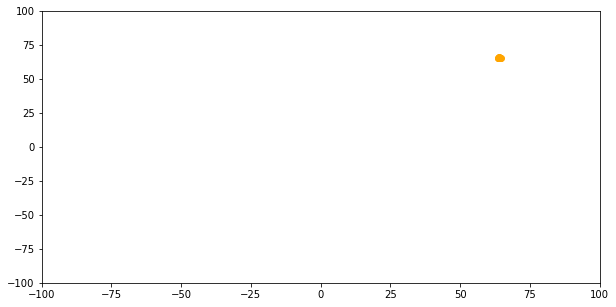

In [10]:
# Master Controls

frames = int(input('How many frames?'))
mito = int(input('Number of mitochondria?'))
c1 = float(input('Attraction Factor?'))
c2 = float(input('Repulsion Factor?'))
c3 = float(input('Heading Factor?'))
c4 = float(input('Randomness Factor?'))
df = cell_py.master_controls(frames,mito,c1,c2,c3,c4)
df.to_csv('pos/master_controls.csv',index = False)

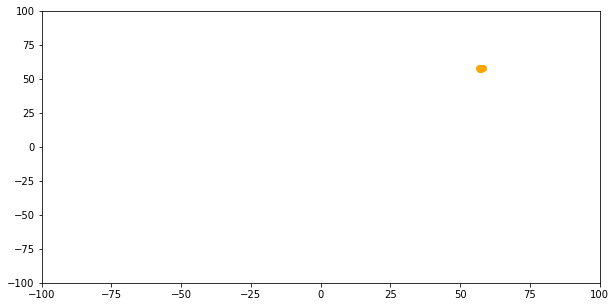

In [8]:
# Attraction Preset

frames = int(input('How many frames?'))
mito = int(input('Number of mitochondria?'))
df = cell_py.attraction(frames,mito)
df.to_csv('pos/attraction.csv',index = False)

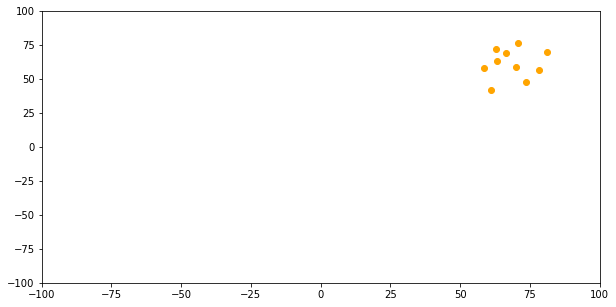

In [9]:
# Repulsion Preset

frames = int(input('How many frames?'))
mito = int(input('Number of mitochondria?'))
df = cell_py.repulsion(frames,mito)
df.to_csv('pos/repulsion.csv',index = False)